In [4]:
import requests
import json
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [5]:
import copernicusmarine

copernicusmarine.subset(
  dataset_id="cmems_mod_bal_phy_anfc_PT15M-i",
  dataset_version="202411",
  variables=["sla", "uo", "vo"],
  minimum_longitude=9.041582107543945,  # Angepasste Koordinate
  maximum_longitude=30.208656311035156,
  minimum_latitude=53.008296966552734,  # Angepasste Koordinate
  maximum_latitude=65.8909912109375,    # Angepasste Koordinate
  start_datetime="2025-02-16T12:00:00",
  end_datetime="2025-02-16T12:00:00",
  coordinates_selection_method="strict-inside",
  disable_progress_bar=True,
  username='mbanzhaf',
  password='6bF$ebvr'
)

/Users/marco/Documents/VirtualEnvironments/.main/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO - 2025-02-11T10:26:12Z - Selected dataset version: "202411"
INFO - 2025-02-11T10:26:12Z - Selected dataset part: "default"
INFO - 2025-02-11T10:26:17Z - Starting download. Please wait...
INFO - 2025-02-11T10:26:18Z - Successfully downloaded to cmems_mod_bal_phy_anfc_PT15M-i_sla-uo-vo_9.04E-30.21E_53.01N-65.89N_2025-02-16_(1).nc


ResponseSubset(file_path=PosixPath('cmems_mod_bal_phy_anfc_PT15M-i_sla-uo-vo_9.04E-30.21E_53.01N-65.89N_2025-02-16_(1).nc'), output_directory=PosixPath('.'), filename='cmems_mod_bal_phy_anfc_PT15M-i_sla-uo-vo_9.04E-30.21E_53.01N-65.89N_2025-02-16_(1).nc', file_size=6.762160305343511, data_transfer_size=13.524320610687024, variables=['sla', 'uo', 'vo'], coordinates_extent=[GeographicalExtent(minimum=9.041582107543945, maximum=30.208656311035156, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=53.008296966552734, maximum=65.8909912109375, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2025-02-16T12:00:00+00:00', maximum='2025-02-16T12:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [6]:
import xarray as xr

# Open the NetCDF file
ds = xr.open_dataset('cmems_mod_bal_phy_anfc_PT15M-i_sla-uo-vo_9.04E-30.21E_53.01N-65.89N_2025-02-16.nc')

# Display the dataset structure
print(ds)


<xarray.Dataset> Size: 7MB
Dimensions:    (time: 1, latitude: 774, longitude: 763)
Coordinates:
  * latitude   (latitude) float32 3kB 53.01 53.02 53.04 ... 65.86 65.87 65.89
  * longitude  (longitude) float32 3kB 9.042 9.069 9.097 ... 30.15 30.18 30.21
  * time       (time) datetime64[ns] 8B 2025-02-16T12:00:00
Data variables:
    sla        (time, latitude, longitude) float32 2MB ...
    uo         (time, latitude, longitude) float32 2MB ...
    vo         (time, latitude, longitude) float32 2MB ...
Attributes:
    title:                     CMEMS NEMO 15 minutes surface model fields
    source:                    CMEMS BAL MFC NEMO model output converted to N...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    comment:                   Data on cropped native product grid. Horizonta...
    institution:               Baltic MFC, PU Swedish Meteorological and Hydr...
    Conventions:               CF-1.0
    references:                https://marine.copernicus.eu/

In [7]:
# List all variables
print(ds.variables)

# Inspect 'sla' data
sla = ds['sla']
print(sla)


Frozen({'sla': <xarray.Variable (time: 1, latitude: 774, longitude: 763)> Size: 2MB
[590562 values with dtype=float32]
Attributes:
    units:          m
    unit_long:      meters
    standard_name:  sea_surface_height_above_sea_level
    long_name:      Sea level elevation, 'uo': <xarray.Variable (time: 1, latitude: 774, longitude: 763)> Size: 2MB
[590562 values with dtype=float32]
Attributes:
    units:          m s-1
    unit_long:      meters per second
    standard_name:  eastward_sea_water_velocity
    long_name:      Eastward current, 'vo': <xarray.Variable (time: 1, latitude: 774, longitude: 763)> Size: 2MB
[590562 values with dtype=float32]
Attributes:
    units:          m s-1
    unit_long:      meters per second
    standard_name:  northward_sea_water_velocity
    long_name:      Northward current, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 774)> Size: 3kB
array([53.008297, 53.024963, 53.04163 , ..., 65.857666, 65.87433 , 65.89099 ],
      dtype=float32)
Attrib

In [8]:
# Extract SLA for the first time index (if there are multiple time steps)
sla_data = sla.isel(time=0)  # Select the first time slice
print(sla_data)

<xarray.DataArray 'sla' (latitude: 774, longitude: 763)> Size: 2MB
[590562 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 3kB 53.01 53.02 53.04 ... 65.86 65.87 65.89
  * longitude  (longitude) float32 3kB 9.042 9.069 9.097 ... 30.15 30.18 30.21
    time       datetime64[ns] 8B 2025-02-16T12:00:00
Attributes:
    units:          m
    unit_long:      meters
    standard_name:  sea_surface_height_above_sea_level
    long_name:      Sea level elevation


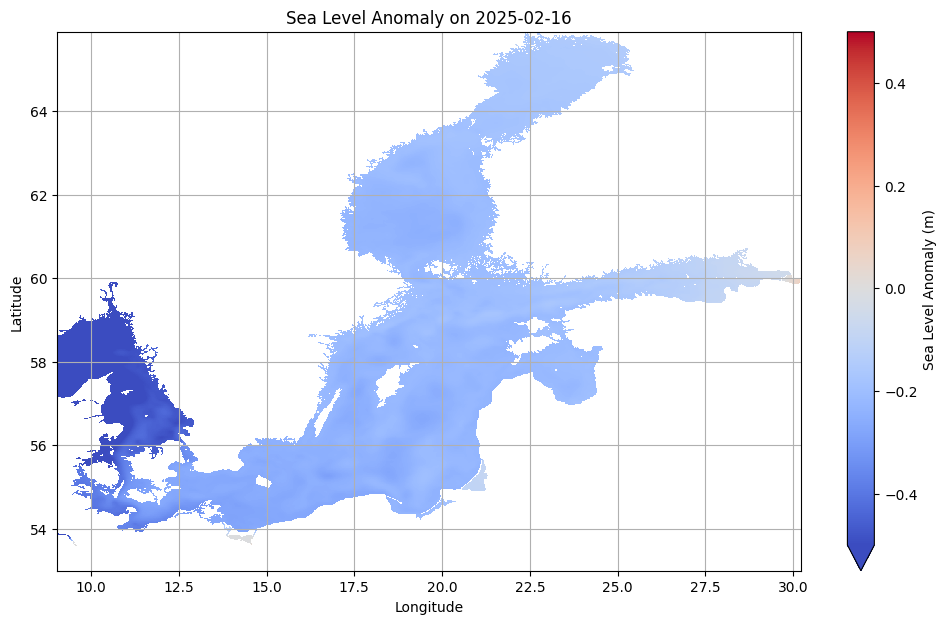

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sla_data.plot(
    cmap='coolwarm',  # Color scheme: blue for low, red for high
    cbar_kwargs={'label': 'Sea Level Anomaly (m)'},
    vmin=-0.5, vmax=0.5  # Set limits if anomalies are within this range
)
plt.title('Sea Level Anomaly on 2025-02-16')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [10]:
# Convert to pandas DataFrame
sla_df = sla_data.to_dataframe().reset_index()

In [11]:
sla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590562 entries, 0 to 590561
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   latitude   590562 non-null  float32       
 1   longitude  590562 non-null  float32       
 2   time       590562 non-null  datetime64[ns]
 3   sla        147134 non-null  float32       
dtypes: datetime64[ns](1), float32(3)
memory usage: 11.3 MB


In [12]:
import copernicusmarine

copernicusmarine.subset(
  dataset_id="cmems_mod_bal_phy_anfc_PT1H-i",
  dataset_version="202411",
  variables=["thetao", "sla"],
  minimum_longitude=10.104315,
  maximum_longitude=10.297262,
  minimum_latitude=54.300509,
  maximum_latitude=54.496203,
  start_datetime="2024-03-01T12:00:00",
  end_datetime="2025-02-11T12:00:00",
  minimum_depth=0.5016462206840515,
  maximum_depth=0.5016462206840515,
  coordinates_selection_method="strict-inside",
  disable_progress_bar=False,
  username='mbanzhaf',
  password='6bF$ebvr'
)

INFO - 2025-02-11T10:26:20Z - Selected dataset version: "202411"
INFO - 2025-02-11T10:26:20Z - Selected dataset part: "default"
INFO - 2025-02-11T10:26:24Z - Starting download. Please wait...
100%|██████████| 8/8 [00:01<00:00,  5.03it/s]
INFO - 2025-02-11T10:26:26Z - Successfully downloaded to cmems_mod_bal_phy_anfc_PT1H-i_thetao-sla_10.12E-10.29E_54.31N-54.49N_0.50m_2024-03-01-2025-02-11_(1).nc


ResponseSubset(file_path=PosixPath('cmems_mod_bal_phy_anfc_PT1H-i_thetao-sla_10.12E-10.29E_54.31N-54.49N_0.50m_2024-03-01-2025-02-11_(1).nc'), output_directory=PosixPath('.'), filename='cmems_mod_bal_phy_anfc_PT1H-i_thetao-sla_10.12E-10.29E_54.31N-54.49N_0.50m_2024-03-01-2025-02-11_(1).nc', file_size=5.340732824427481, data_transfer_size=68.52201526717558, variables=['thetao', 'sla'], coordinates_extent=[GeographicalExtent(minimum=10.124911308288574, maximum=10.291577339172363, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=54.30827713012695, maximum=54.491607666015625, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2024-03-01T12:00:00+00:00', maximum='2025-02-11T12:00:00+00:00', unit='iso8601', coordinate_id='time'), GeographicalExtent(minimum=0.5016462206840515, maximum=0.5016462206840515, unit='m', coordinate_id='depth')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [60]:
file = 'cmems_mod_bal_phy_anfc_PT1H-i_thetao-sla_10.12E-10.29E_54.31N-54.49N_0.50m_2024-03-01-2025-02-11.nc'

ds = xr.open_dataset(file)

# to dataframe
df = ds.to_dataframe().reset_index()



long = 10.152689
lat =  54.358276

val = 0.5
# Extract data which is close to the given coordinates
df_subset = df[
    (df['longitude'] >= long - val) & (df['longitude'] <= long + val) &
    (df['latitude'] >= lat - val) & (df['latitude'] <= lat + val)
]


df_subset = df_subset.dropna(axis=0, how='any')
df_subset = df_subset.groupby('time').agg({'sla': 'mean', 'thetao': 'mean'})
df_subset = df_subset.reset_index()
df_subset

,time,sla,thetao
0,2024-03-01 12:00:00,-0.116723,4.558457
1,2024-03-01 13:00:00,-0.108077,4.655815
2,2024-03-01 14:00:00,-0.095238,4.736517
3,2024-03-01 15:00:00,-0.081557,4.784991
4,2024-03-01 16:00:00,-0.073076,4.821863
...,...,...,...
8324,2025-02-11 08:00:00,0.077252,3.670702
8325,2025-02-11 09:00:00,0.068245,3.661306
8326,2025-02-11 10:00:00,0.063297,3.660661
8327,2025-02-11 11:00:00,0.067026,3.666016


In [61]:
import plotly.graph_objects as go



fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_subset['time'],
    y=df_subset['thetao'],
    mode='lines',
    name='Sea Water Temperature'
))

fig.update_layout(
    title='Sea Water Temperature near Kiel',
    xaxis_title='Time',
    yaxis_title='Sea Water Temperature (°C)',
    template='plotly_white'
)

fig.show()


In [66]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_subset['time'],
    y=df_subset['sla'],
    mode='lines',
    name='Sea Water Temperature'
))

fig.update_layout(
    title='Sea Level Anomaly near Kiel',
    xaxis_title='Time',
    yaxis_title='Sea Level Anomaly (m)',
    template='plotly_white',
    #xaxis_type='category'  # Disable automatic averaging
)

fig.show()

In [63]:
from frost_server import FrostServer

server = FrostServer()
observation_url = server.get_observations_url()
content = server.get_content(observation_url)
all_observations = server.get_all_observations()

df_obs = pd.DataFrame(all_observations)
df_obs["phenomenonTime"] = pd.to_datetime(df_obs["phenomenonTime"])
df_obs["resultTime"] = pd.to_datetime(df_obs["resultTime"])

# convert result to float
df_obs["result"] = df_obs["result"].astype(float)

In [64]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_obs['phenomenonTime'],
    y=df_obs['result'],
    mode='lines',
    name='Temperature T-Box'
))

fig.add_trace(go.Scatter(
    x=df_subset['time'],
    y=df_subset['thetao'],
    mode='lines',
    name='Sea Water Temperature Copernicus'
))

fig.update_layout(
    title='Sea Water Temperature in Kiel',
    xaxis_title='Time',
    yaxis_title='Sea Water Temperature (°C)',
    template='plotly_white'
)

fig.show()

In [69]:
# calculate the average difference between the two datasets
diff = df_obs["result"].mean() - df_subset["thetao"].mean()
print(f"Average difference between the two datasets: {diff:.2f}°C")

Average difference between the two datasets: 1.97°C


In [68]:
# delte files which end with .nc
import os
import glob

files = glob.glob('*.nc')

for f in files:
    os.remove(f)
    print(f"Deleted {f}")


Deleted cmems_mod_bal_phy_anfc_PT1H-i_thetao-sla_10.12E-10.29E_54.31N-54.49N_0.50m_2024-03-01-2025-02-11.nc
Deleted cmems_mod_bal_phy_anfc_P1D-m_multi-vars_9.79E-14.21E_53.31N-58.07N_0.50m_2023-10-18-2023-10-21.nc
Deleted cmems_mod_bal_phy_anfc_PT15M-i_sla-uo-vo_9.04E-30.21E_53.01N-65.89N_2025-02-16.nc
Deleted cmems_mod_bal_phy_anfc_PT1H-i_thetao-sla_10.12E-10.29E_54.31N-54.49N_0.50m_2024-03-01-2025-02-11_(1).nc
Deleted cmems_mod_bal_phy_anfc_PT15M-i_sla-uo-vo_9.04E-30.21E_53.01N-65.89N_2025-02-16_(1).nc
Deleted cmems_mod_bal_phy_anfc_PT1H-i_multi-vars_10.12E-10.29E_54.31N-54.49N_0.50m_2024-09-01-2025-02-11.nc
